# Module One Partner Project 
### Created by: Andy Luc and Connor Anderson 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [108]:
df = pd.read_csv('kc_house_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [109]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


# Data Cleaning

In [110]:
'''Dropping ? from SqFt Basement'''

df['sqft_basement'] = df['sqft_basement'].replace("?",0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [111]:
'''Drop all records in DF where values in Waterfront, View are NaN.
Also Dropping Yr_Ren, Lat, and Long. We have zipcodes so Lat and Long seemed uneccsesary'''
df = df[~np.isnan(df['waterfront'])]
df = df[~np.isnan(df['view'])]
df = df.drop(['yr_renovated','lat','long'], axis=1)
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['zipcode'] = df['zipcode'].astype(str)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 18 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
zipcode          19164 non-null object
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 2.8+ MB


# OLS Model 

In [113]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [114]:
f = 'price~ sqft_living'

In [115]:
model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:29:08   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.86e+04   4697.110    -10.348      

In [116]:
model.params

Intercept     -48604.077596
sqft_living      283.401625
dtype: float64

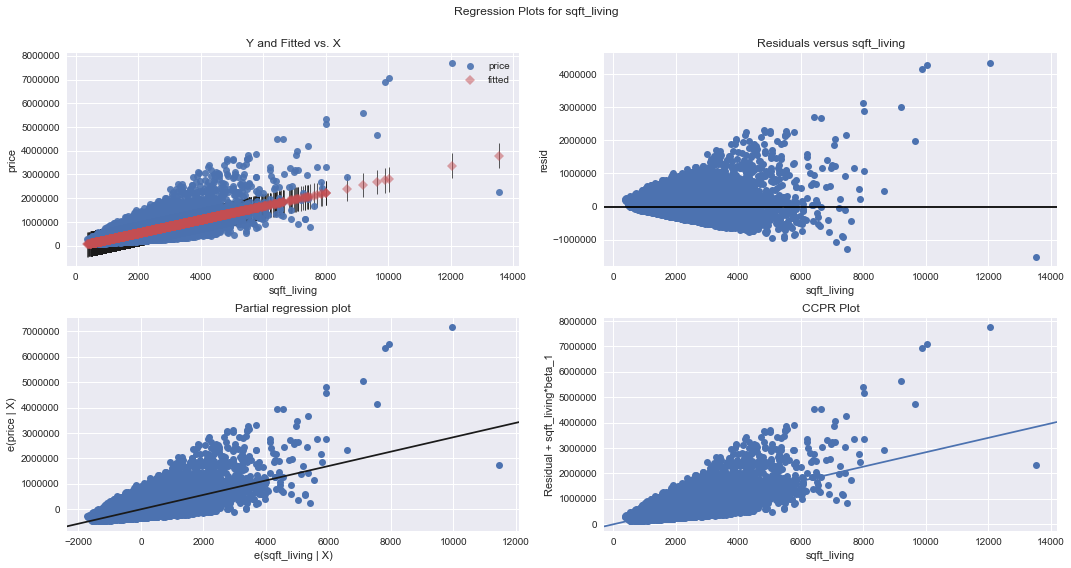

In [117]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)

# Visualization

Pairplot of Sqft Living, Bedrooms, Bathrooms in relation to Price.

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


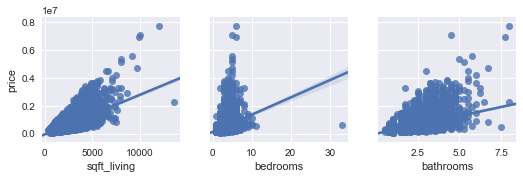

In [118]:
sns.pairplot(df,x_vars=['sqft_living','bedrooms','bathrooms'], y_vars='price', kind='reg')

# Multi-Collinearity of Features 

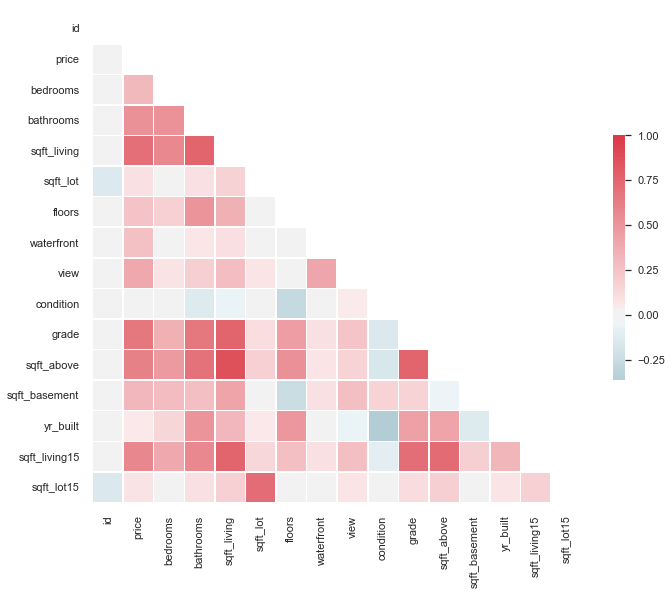

In [119]:
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

In [120]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [121]:
df_mc = df.iloc[:, 1:]

In [122]:
df_mc.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.309057,0.526609,0.704428,0.087430,0.258797,0.270982,0.395766,0.037514,0.667719,0.609611,0.318839,0.053433,0.582450,0.081562
bedrooms,0.309057,1.000000,0.516137,0.577972,0.029685,0.181909,-0.004082,0.083542,0.025047,0.359619,0.480400,0.295875,0.157011,0.392586,0.028005
bathrooms,0.526609,0.516137,1.000000,0.755909,0.085666,0.506058,0.064608,0.186980,-0.126612,0.666475,0.687621,0.277739,0.507069,0.569443,0.086466
sqft_living,0.704428,0.577972,0.755909,1.000000,0.173624,0.356938,0.107416,0.285976,-0.057704,0.763701,0.877669,0.427308,0.317123,0.755524,0.183177
sqft_lot,0.087430,0.029685,0.085666,0.173624,1.000000,-0.007519,0.023164,0.071064,-0.013656,0.114968,0.184383,0.014532,0.055560,0.146576,0.721839
floors,0.258797,0.181909,0.506058,0.356938,-0.007519,1.000000,0.021399,0.029147,-0.263421,0.458230,0.525039,-0.238997,0.490251,0.280229,-0.011145
waterfront,0.270982,-0.004082,0.064608,0.107416,0.023164,0.021399,1.000000,0.406654,0.017175,0.085644,0.073500,0.085962,-0.026612,0.087257,0.031958
view,0.395766,0.083542,0.186980,0.285976,0.071064,0.029147,0.406654,1.000000,0.047143,0.248898,0.168695,0.274985,-0.055862,0.276719,0.071207
condition,0.037514,0.025047,-0.126612,-0.057704,-0.013656,-0.263421,0.017175,0.047143,1.000000,-0.144898,-0.155922,0.166899,-0.361988,-0.092609,-0.004996
grade,0.667719,0.359619,0.666475,0.763701,0.114968,0.458230,0.085644,0.248898,-0.144898,1.000000,0.757406,0.165213,0.446364,0.713765,0.120664


In [123]:
abs(df_mc.corr()) > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


# EDA

## Day 1: Creating Linear Models in order to explore and understand the relationships in our data

## MODEL 1
Sqft Living, Bedrooms, Bathrooms vs Price. All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

RMSE = 267,760

In [124]:
import sklearn

In [125]:
feature_cols = ['sqft_living','sqft_lot','bathrooms']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg1 = LinearRegression()
linreg1.fit(X_train, y_train)

print(linreg1.intercept_)

print(linreg1.coef_)

zip(feature_cols, linreg1.coef_)

-50393.4502417224
[ 2.96862661e+02 -3.07106204e-01 -9.50930266e+03]


In [126]:
y_pred = linreg1.predict(X_test)

In [127]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

170177.4613615296
61372991917.835915
247735.72999839147


## Results of Model 1

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
print(np.sqrt(-cross_val_score(linreg1, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg1.predict(X)-y.values)
print(y.values)
print(linreg1.score(X,y))

[278393.57142165 267676.8013491  249457.58989135 252751.00383729
 266351.31599542]
[ 150923.59401485  -14389.56609158 -102606.07398399 ...  209800.83129656
 -157241.10655057  -80055.95945065]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.4974174551370462


## MODEL 2
SqFt Living 15, Sqft Loft 15, Grade vs Price: These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home. 

RMSE = 268,447

In [130]:
feature_cols = ['sqft_living15','sqft_lot15','grade']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

print(linreg2.intercept_)

print(linreg2.coef_)

zip(feature_cols, linreg2.coef_)

-958746.3558276349
[ 1.21531554e+02 -3.13755469e-01  1.65089711e+05]


In [131]:
y_pred = linreg2.predict(X_test)

In [132]:
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

170033.855518158
63080698192.17135
251158.71116123238


## Results of Model 2

In [133]:
print(np.sqrt(-cross_val_score(linreg2, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg2.predict(X)-y.values)
print(y.values)
print(linreg2.score(X,y))

[291293.81712908 281063.53171511 251292.5976687  253390.13104581
 273899.68732832]
[-138126.8328366   179828.23901413 -243404.24509692 ...  182115.0340163
  -81886.90346494   -4581.96241008]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.4689025947944729


## Model 3
Sqft vs Price

RMSE = 272,526

In [134]:
feature_cols = ['sqft_living']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg3 = LinearRegression()
linreg3.fit(X_train, y_train)

print(linreg3.intercept_)

print(linreg3.coef_)

zip(feature_cols, linreg3.coef_)



-51419.81818777346
[284.0436934]


In [135]:
"""PREDICTION OF Y"""
y_pred = linreg3.predict(X_test)

In [136]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

175583.2123041612
69631809473.18102
263878.39902724326


## Results of Model 3

In [137]:
print(np.sqrt(-cross_val_score(linreg3, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg3.predict(X)-y.values)
print(y.values)
print(linreg3.score(X,y))

[278314.48481802 268163.69621184 250119.46322606 253178.38548632
 266150.56171007]
[ 140572.47385452  -12706.17426849  -98694.1791205  ...  204721.11357009
 -163796.25091807  -86695.25091807]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.49620080770457714


## Model 4 
Grade vs Price

RMSE: 275,061


In [138]:
feature_cols = ['grade']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg4 = LinearRegression()
linreg4.fit(X_train, y_train)

print(linreg4.intercept_)

print(linreg4.coef_)

zip(feature_cols, linreg4.coef_)

-1069463.9975282205
[210254.49206087]


In [139]:
"""PREDICTION OF Y"""
y_pred = linreg4.predict(X_test)

In [140]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

176906.9759716921
77336362119.20238
278094.160526974


## Results of Model 4

In [141]:
print(np.sqrt(-cross_val_score(linreg4, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg4.predict(X)-y.values)
print(y.values)
print(linreg4.score(X,y))

[298012.25528092 286247.06509287 258318.69969054 260525.58778684
 276417.33183734]
[-135682.55310214   12062.95483699 -201682.55310214 ...  212571.93895873
     216.44689786   77317.44689786]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.44584623889746766


# Model 5
Year Built and SQFT Living in relation to Price.

RMSE: 239,004

In [142]:
feature_cols = ['yr_built', 'sqft_living' ]
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg5 = LinearRegression()
linreg5.fit(X_train, y_train)

print(linreg5.intercept_)

print(linreg5.coef_)

zip(feature_cols, linreg5.coef_)

4570601.550984547
[-2371.45225437   310.54593394]


In [143]:
"""PREDICTION OF Y"""
y_pred = linreg5.predict(X_test)

In [144]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

163781.22727690364
59548133791.20016
244024.8630594845


## Results of Model 5

In [145]:
print(np.sqrt(-cross_val_score(linreg5, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg5.predict(X)-y.values)
print(y.values)
print(linreg5.score(X,y))

[268201.47298304 256758.84916746 240597.08582375 242870.73228201
 268986.80523217]
[ 204001.25293864   45704.71242152  -84632.09832723 ...  111857.81808834
 -278990.17542512 -199517.72317075]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.5282548572647299


# Model 6
Year Built, Condition, SQFT Living in relation to Price.

RMSE: 

In [146]:
feature_cols = ['yr_built', 'sqft_living', 'view' ]
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg6 = LinearRegression()
linreg6.fit(X_train, y_train)

print(linreg6.intercept_)

print(linreg6.coef_)

zip(feature_cols, linreg6.coef_)

3894527.5389872934
[-2008.95083882   280.53448924 89756.69966251]


In [147]:
"""PREDICTION OF Y"""
y_pred = linreg6.predict(X_test)

In [148]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

165793.0144642556
62961043031.06708
250920.39181992976


## Results of Model 6

In [149]:
print(np.sqrt(-cross_val_score(linreg6, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg6.predict(X)-y.values)
print(y.values)
print(linreg6.score(X,y))

[258185.97687799 249637.84858877 234106.18620743 233686.81704428
 259690.56996349]
[ 158038.08981085   47237.12426873 -107213.26037202 ...   96535.21976157
 -257410.51717029 -178300.56633147]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.5593288699423387


# Model 7
SQFT Lving vs SQFT Living15 vs Price

In [150]:
feature_cols = ['sqft_living15', 'sqft_living', 'view', 'waterfront', 'condition', 'bathrooms']
X = df[feature_cols]
y =df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg7 = LinearRegression()
linreg7.fit(X_train, y_train)

print(linreg7.intercept_)

print(linreg7.coef_)

zip(feature_cols, linreg7.coef_)

-214823.55077754706
[5.26226342e+01 2.34678251e+02 6.88694334e+04 6.48982485e+05
 4.02083827e+04 3.35781954e+03]


In [151]:
"""PREDICTION OF Y"""
y_pred = linreg7.predict(X_test)

In [152]:
"""OUTPUTTING RMSE """
from sklearn import metrics

#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

162581.04265280522
53844025104.75924
232043.153539938


## Results of Model 7

In [153]:
print(np.sqrt(-cross_val_score(linreg7, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg7.predict(X)-y.values)
print(y.values)
print(linreg7.score(X,y))

[254327.11137192 251161.33696306 233978.62780389 236030.12904327
 256107.07847637]
[  67412.04841108   52995.23526758  -76172.02391689 ...  152602.32680196
 -200734.13496826 -123633.13496826]
[538000. 180000. 604000. ... 400000. 402101. 325000.]
0.5619693181406192


# Model Comparison Graph

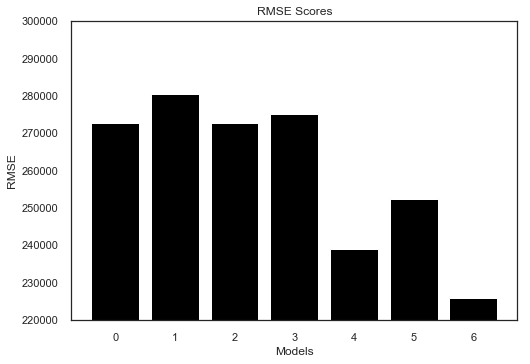

In [154]:
Values ={'Model 1': 272526.5175180645, 'Model 2': 280403.1883537865, 
         'Model 3': 272526.5175180645, 'Model 4': 275061.1093215885, 
         'Model 5': 239004.38679856234, 'Model 6': 252386.96082953044,
        'Model 7': 225867.24350925296}
"""Model 7 is overfit"""
#plt.scatter(Values['key'], Values['value'])

# for key in comp:

#     plt.bar([key]*8, comp[key], label=key)

# plt.legend()
# plt.show()

plt.bar(range(len(Values)), list(Values.values()), color = ('Black'))
plt.ylim(220000,300000)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Scores')
plt.show()











In [155]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,1.916400e+04,1.916400e+04,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,4.594087e+09,5.414490e+05,3.374452,2.117029,2082.038301,1.506174e+04,1.495173,0.007566,0.231058,3.409987,7.660718,1791.425433,284.380662,1971.039553,1987.221874,12797.653882
std,2.876912e+09,3.709009e+05,0.928676,0.769241,921.918226,4.077215e+04,0.540308,0.086657,0.763368,0.650456,1.175601,831.776073,439.443059,29.388020,684.787028,27552.634083
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,2.124077e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,7.334501e+09,6.439625e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2217.750000,540.000000,1997.000000,2360.000000,10093.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


## Day 2: Understanding and manipulating data in order to create a more effective model


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 18 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null float64
yr_built         19164 non-null int64
zipcode          19164 non-null object
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 2.8+ MB


In [157]:
import statsmodels.formula.api as smf


In [186]:
# col_names = df.describe().columns.drop(['price'])
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
# for idx, val in enumerate(col_names):
#     print ("Df: Weekly_Sales~" + val)
#     print ("------------------------------")

#     f = 'price~' + val
#     model = smf.ols(formula=f, data=df).fit()
#     X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
#     preds = model.predict(X_new)
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])

In [185]:
#pd.DataFrame(results)

In [184]:
#_=df.hist(figsize = (22,30))



## Notes:

### SqFt Living, SqFt Living15, SqFt Above, Yr_Built are all skewed. 

### Some outliers we may need to look at are SqFt Lot and SqFt Lot15

### Grade is very normal, so it could be a good indicator of how price. 





In [161]:
# for column in ['bathrooms',
#        'bedrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'price']:
#     df[column].plot.hist(density=True )
#     df[column].plot.kde(label=column )
#     plt.legend()
#     plt.show()

In [162]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [163]:
log_price = np.log(df['price'])

In [164]:
df['price'].head()

1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
Name: price, dtype: float64

In [165]:
log_price.head()

1    13.195614
2    12.100712
3    13.311329
4    13.142166
5    14.022525
Name: price, dtype: float64

## Model 8(Log Price)

In [187]:
feature_cols = ['sqft_living']
X = df[feature_cols]
y = log_price

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression

linreg8 = LinearRegression()
linreg8.fit(X_train, y_train)

print(linreg8.intercept_)

print(linreg8.coef_)

zip(feature_cols, linreg8.coef_)


12.219402417630807
[0.00039955]


In [188]:
"""PREDICTION OF Y"""
y_pred = linreg8.predict(X_test)

In [189]:
"""OUTPUTTING RMSE """


#result of Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

#result of Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

#result Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.3071426568622666
0.1413361937490428
0.37594706242906434


In [191]:
print(np.sqrt(-cross_val_score(linreg8, X, y, cv=5, scoring='neg_mean_squared_error')))

print(linreg8.predict(X)-y.values)

print(y.values)

print(linreg8.score(X,y))

[0.38821687 0.37987524 0.37961286 0.38351842 0.36023571]
[ 0.05061995  0.42634015 -0.30881831 ...  0.24313219 -0.27751998
 -0.06464186]
[13.19561384 12.10071213 13.31132948 ... 12.89921983 12.90445858
 12.69158046]
0.48507801501769937
